# Candidate Project #

#### by Tony Chow on August 30, 2021 ####

## Laptop Sales ##

#### Business Problem: #### 
One of the projects you’ll be working on as an analyst is helping the business understand its health by building data models and recommending growth opportunities. One morning, the Vice President of the Laptops Division comes by your desk and asks you:

Question 1 : “Are we going to hit our sales budget for the first quarter of 2020 (Jan, Feb, March)? How much will we be missing/exceeding the budget by?

Question 2 : “What can we do to either meet/exceed budget?”


#### Deliverables: ####
Presentation deck for the Vice President of the Laptops Division 
Working files/scripts/code as separate files or include in the appendix of the presentation deck


In [20]:
# import all necessary library packages:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [21]:
# setting up file locations
data_file = 'Data Analyst Assignment Data.xlsx'


In [22]:
# reading in the file

#reads the sales data into the dataframe
df = pd.read_excel(data_file)
#store the variable definations into vd so we can do a quick look up if needed
vd = pd.read_excel(data_file, sheet_name='Variable Definitions')

In [23]:
#print the first few lines of the dataframe
df.head()

,Date,Sales,Budget,Sales vs Budget Diff,Product Page Visits,Sold Out Product Page Visits,Visits and OOS
0,2015-01-01,14840.0,13740.0,1100.0,NaN,NaN,0.0
1,2015-02-01,14820.0,16466.0,-1646.0,NaN,NaN,0.0
2,2015-03-01,17920.0,18474.0,-554.0,NaN,NaN,0.0
3,2015-04-01,19020.0,17449.0,1571.0,NaN,NaN,0.0
4,2015-05-01,20600.0,22150.0,-1550.0,NaN,NaN,0.0


In [24]:
#some summary statistics to further understand the data
df.describe()

,Sales,Budget,Sales vs Budget Diff,Product Page Visits,Sold Out Product Page Visits,Visits and OOS
count,60.000000,72.000000,60.000000,52.000000,52.000000,72.000000
mean,27071.550000,27638.319444,-264.433333,98331.004274,979.960397,71724.585595
std,11223.424811,11280.028726,3020.438903,15468.335470,349.526792,46686.402029
min,13940.000000,12907.000000,-9051.000000,71431.388889,26.268402,0.000000
25%,18955.000000,19803.250000,-1574.000000,86450.902778,787.840922,0.000000
50%,24310.000000,25209.000000,-344.500000,95557.222222,942.530002,90323.813580
75%,30455.000000,30889.500000,1111.000000,110150.986111,1132.980546,105415.195776
max,64440.000000,66432.000000,8000.000000,133969.333333,1982.983570,135610.693666


Some preliminary observations:
- the summary statistics for sales and budgets are very similar.
- our company budgeted 12 more period beyond sales. I assumed we are now at the year end of Dec 2019
- there were 8 time period did not have the page visit count tracked (Jan - Aug 2015)

In [25]:
# Lets plot the data to understand further

# first... write a function for plotting and comparing (will be used twice)

def tcplotty(df1, varx, vary1, vary2, fsx, fsy):
    start = min(df1[varx]).strftime("%b-%d-%Y")
    end = max(df1[varx]).strftime("%b-%d-%Y")
    plt.figure(figsize=[fsx, fsy]);
    plt.plot(df1[varx], df1[vary1], label=vary1)
    plt.plot(df1[varx], df1[vary2], label=vary2)
    plt.title(f'Laptop {vary1} vs {vary2} from {start} to {end}')
    plt.xlabel(varx)
    plt.ylabel(f'{vary1}/{vary2}')
    plt.grid(True)
    plt.legend(loc="upper left")
    plt.show()
    
def tcplotty1(df1, varx, vary1, fsx, fsy):
    start = min(df1[varx]).strftime("%b-%d-%Y")
    end = max(df1[varx]).strftime("%b-%d-%Y")
    plt.figure(figsize=[fsx, fsy]);
    plt.plot(df1[varx], df1[vary1], label=vary1)
    plt.title(f'Laptop {vary1} from {start} to {end}')
    plt.xlabel(varx)
    plt.ylabel(f'{vary1}')
    plt.grid(True)
    plt.legend(loc="upper left")
    plt.show()

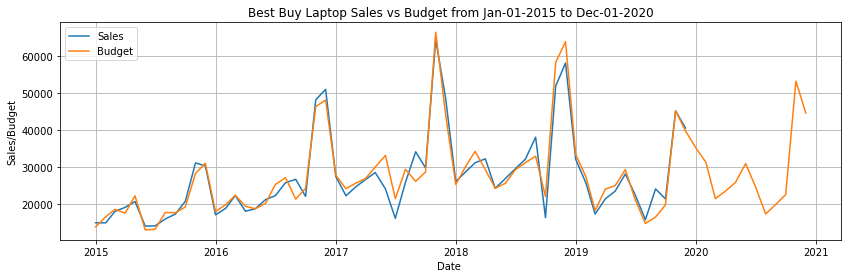

In [26]:
compare_df1 = df[['Date ', 'Sales', 'Budget']]#.dropna()
tcplotty(compare_df1, 'Date ', 'Sales', 'Budget', 14, 4)

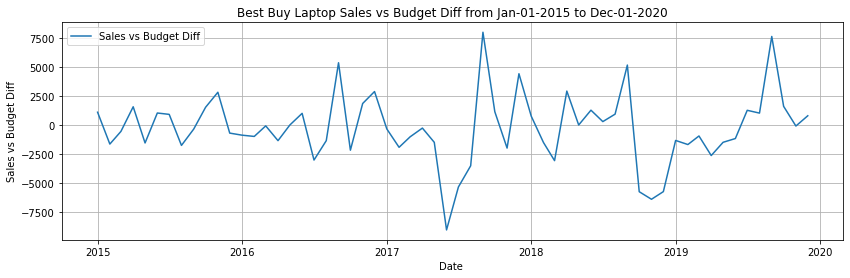

In [27]:
compare_df3 = df[['Date ', 'Sales vs Budget Diff']]#.dropna()
tcplotty1(compare_df3, 'Date ', 'Sales vs Budget Diff', 14, 4)

It seems that the Sales follow closely with the budget.
At this point, I wonder, how was the budget determined? If we are to create a model for Sales forcast, the method that budget is determined is already an excellent model...

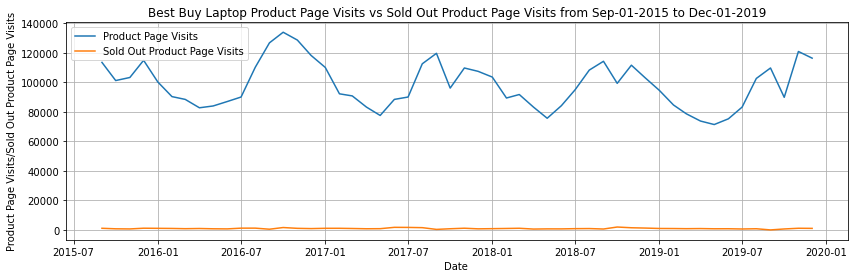

In [28]:
# we will compare the other two variables
compare_df2 = df[['Date ', 'Product Page Visits', 'Sold Out Product Page Visits']].dropna()
tcplotty(compare_df2, 'Date ', 'Product Page Visits', 'Sold Out Product Page Visits', 14, 4)

Here because of the high difference in counts, we will have to scale our data in order to take a closer look.

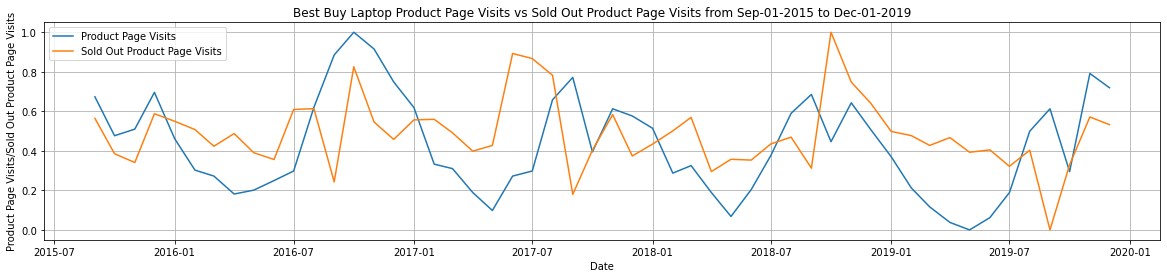

In [29]:
scaler = preprocessing.MinMaxScaler()
df2 = df[['Date ', 'Product Page Visits', 'Sold Out Product Page Visits']].dropna()
temp = df2.drop(columns=['Date '])
names = temp.columns
d = scaler.fit_transform(temp)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df['Date'] = df2[['Date ']].reset_index(drop=True)
tcplotty(scaled_df, 'Date', 'Product Page Visits', 'Sold Out Product Page Visits', 20, 4)

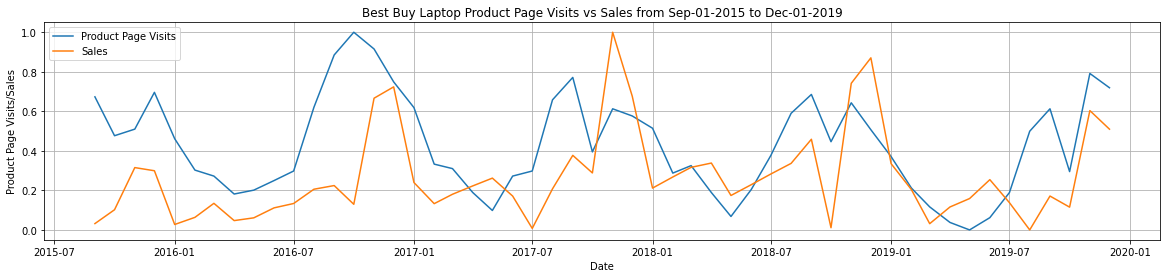

In [30]:
#examine Product Page Visits vs Sales
scaler = preprocessing.MinMaxScaler()
df3 = df[['Date ', 'Product Page Visits', 'Sales']].dropna()
temp = df3.drop(columns=['Date '])
names = temp.columns
d = scaler.fit_transform(temp)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df['Date'] = df3[['Date ']].reset_index(drop=True)
tcplotty(scaled_df, 'Date', 'Product Page Visits', 'Sales', 20, 4)

In [42]:
#lets use shift() method to examine the corrlation between shifted product page visit vs sales

df_diff = df.dropna()
df_diff['Visit_diff1'] = df['Product Page Visits'].shift(2).dropna()
#df_diff['OOS_diff1'] = df['Sold Out Product Page Visits'].shift(10).dropna()
df_diff.corr(method ='pearson')

#there is a moderate relationship when shifts is in 0, 2 and 3.

<ipython-input-42-4d8a0b07a575>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['Visit_diff1'] = df['Product Page Visits'].shift(2).dropna()


,Sales,Budget,Sales vs Budget Diff,Product Page Visits,Sold Out Product Page Visits,Visits and OOS,Visit_diff1
Sales,1.000000,0.959618,0.074181,0.444382,0.021111,0.443236,0.414746
Budget,0.959618,1.000000,-0.209346,0.353949,0.260627,0.358526,0.418445
Sales vs Budget Diff,0.074181,-0.209346,1.000000,0.289936,-0.850551,0.269729,-0.038363
Product Page Visits,0.444382,0.353949,0.289936,1.000000,0.151057,0.999752,0.419349
Sold Out Product Page Visits,0.021111,0.260627,-0.850551,0.151057,1.000000,0.173019,0.225939
Visits and OOS,0.443236,0.358526,0.269729,0.999752,0.173019,1.000000,0.422961
Visit_diff1,0.414746,0.418445,-0.038363,0.419349,0.225939,0.422961,1.000000


In [43]:
# df.corr(method ='pearson')


# for x in range(-12,13):
#     df_diff = df[['Sales', 'Product Page Visits']].dropna()
#     df_diff['Visit_diff1'] = df['Product Page Visits'].shift(x).dropna()
#     #df_diff['OOS_diff1'] = df['Sold Out Product Page Visits'].shift(10).dropna()
#     #df_diff.corr(method ='pearson')
#     print(x)
#     print(df_diff.corr(method ='pearson'))


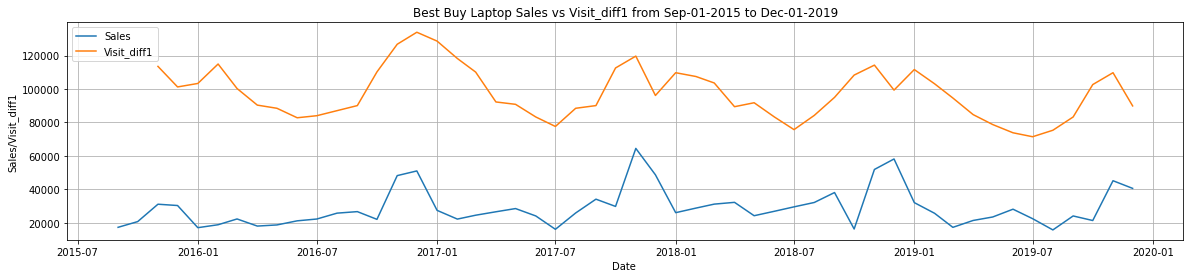

In [45]:
tcplotty(df_diff, 'Date ', 'Sales', 'Visit_diff1', 20, 4)

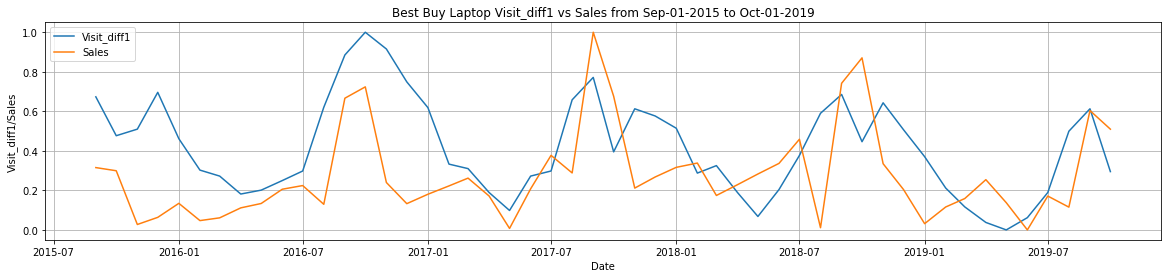

In [46]:
scaler = preprocessing.MinMaxScaler()
df4 = df_diff[['Date ', 'Visit_diff1', 'Sales']].dropna()
temp = df4.drop(columns=['Date '])
names = temp.columns
d = scaler.fit_transform(temp)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df['Date'] = df3[['Date ']].reset_index(drop=True)
tcplotty(scaled_df, 'Date', 'Visit_diff1', 'Sales', 20, 4)